In [1]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.mlab as mlab
from matplotlib.patches import Ellipse


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
A = np.loadtxt('trainingdata.train')
Asize = A.shape # via property of element
print ("A size: ", Asize)
print(A)

A size:  (150, 5)
[[  3.68152970e+00   2.64283790e+00   5.32422460e+00   3.70885630e+00
    2.91608700e+00]
 [  6.86537410e+00   3.36977760e+00   6.29818860e+00   6.37060620e+00
    3.74587640e+00]
 [  5.59835490e+00   8.26449440e+00   8.58288350e+00   6.43786610e+00
    6.06634450e+00]
 [  9.20736720e-01   7.22946890e+00   4.27243450e+00   8.55275110e+00
    7.18276870e+00]
 [  4.99595020e+00   2.98084530e+00   4.34097140e+00   4.77708860e+00
    3.59211630e+00]
 [  5.25648480e+00   1.21256640e+00   3.94521550e+00   6.45309580e+00
    2.26316490e+00]
 [  5.04924770e+00   2.53627110e+00   3.12046330e+00   5.71324860e+00
    8.18019140e+00]
 [  1.19805080e+00   8.37536560e+00   9.27656780e+00   9.13232940e+00
    7.21768890e+00]
 [  8.13815910e+00   4.16456630e+00   7.32042260e+00   7.18125610e-01
    3.78429740e+00]
 [  5.84519030e+00   7.07016540e+00   4.64904930e-02   6.33902320e-01
    6.49455050e+00]
 [  3.93887000e+00   9.46164860e+00   7.83085990e+00   6.93373560e+00
    7.140962

In [3]:
#fig0 = plt.figure()
#ax0 = fig0.add_subplot( 111 )
#ax0.scatter( A[:,3], A[:,4] )
#plt.show()
#significant columns found, 3x4
def getcolour(x):
    if(x==0):
        return 'r';
    elif(x==1):
        return 'g';
    elif(x==2):
        return 'b'
    elif(x==3):
        return 'brown'
    elif(x==4):
        return 'yellow'
    elif(x==5):
        return 'pink'
    elif(x==6):
        return'cyan'

In [19]:
B = np.matrix([A[:,1], A[:,4]]).T
Bsize = B.shape # via property of element
print ("B size: ", Bsize)


B size:  (150, 2)


In [5]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(B)
    #max_iter=1, precompute_distances=False, n_init =1
    #print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#print(labels)
print(centroids)


[[ 2.81254086  7.08071353]
 [ 7.49265209  6.66497288]
 [ 3.22268608  3.24782012]]


In [6]:
colourlist = []

for x in range(0,int(B.size/2)):
        colourlist.append(getcolour(labels[x]))

print(colourlist)



['b', 'b', 'g', 'g', 'b', 'b', 'r', 'g', 'b', 'g', 'g', 'g', 'r', 'g', 'b', 'r', 'b', 'g', 'g', 'r', 'b', 'g', 'g', 'r', 'b', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'r', 'b', 'b', 'r', 'g', 'b', 'r', 'b', 'r', 'r', 'g', 'b', 'r', 'b', 'g', 'r', 'r', 'b', 'g', 'r', 'g', 'b', 'b', 'r', 'g', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'b', 'b', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'b', 'r', 'g', 'b', 'g', 'b', 'g', 'g', 'r', 'b', 'r', 'r', 'g', 'b', 'r', 'b', 'g', 'b', 'r', 'g', 'r', 'g', 'r', 'g', 'g', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'g', 'r', 'g', 'g', 'b', 'g', 'b', 'r', 'b', 'r', 'b', 'g', 'r', 'g', 'g', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'b', 'g', 'r', 'b', 'g', 'r', 'b', 'b', 'r', 'r', 'r', 'g', 'g', 'r', 'r', 'g']


/home/harrygoode22/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


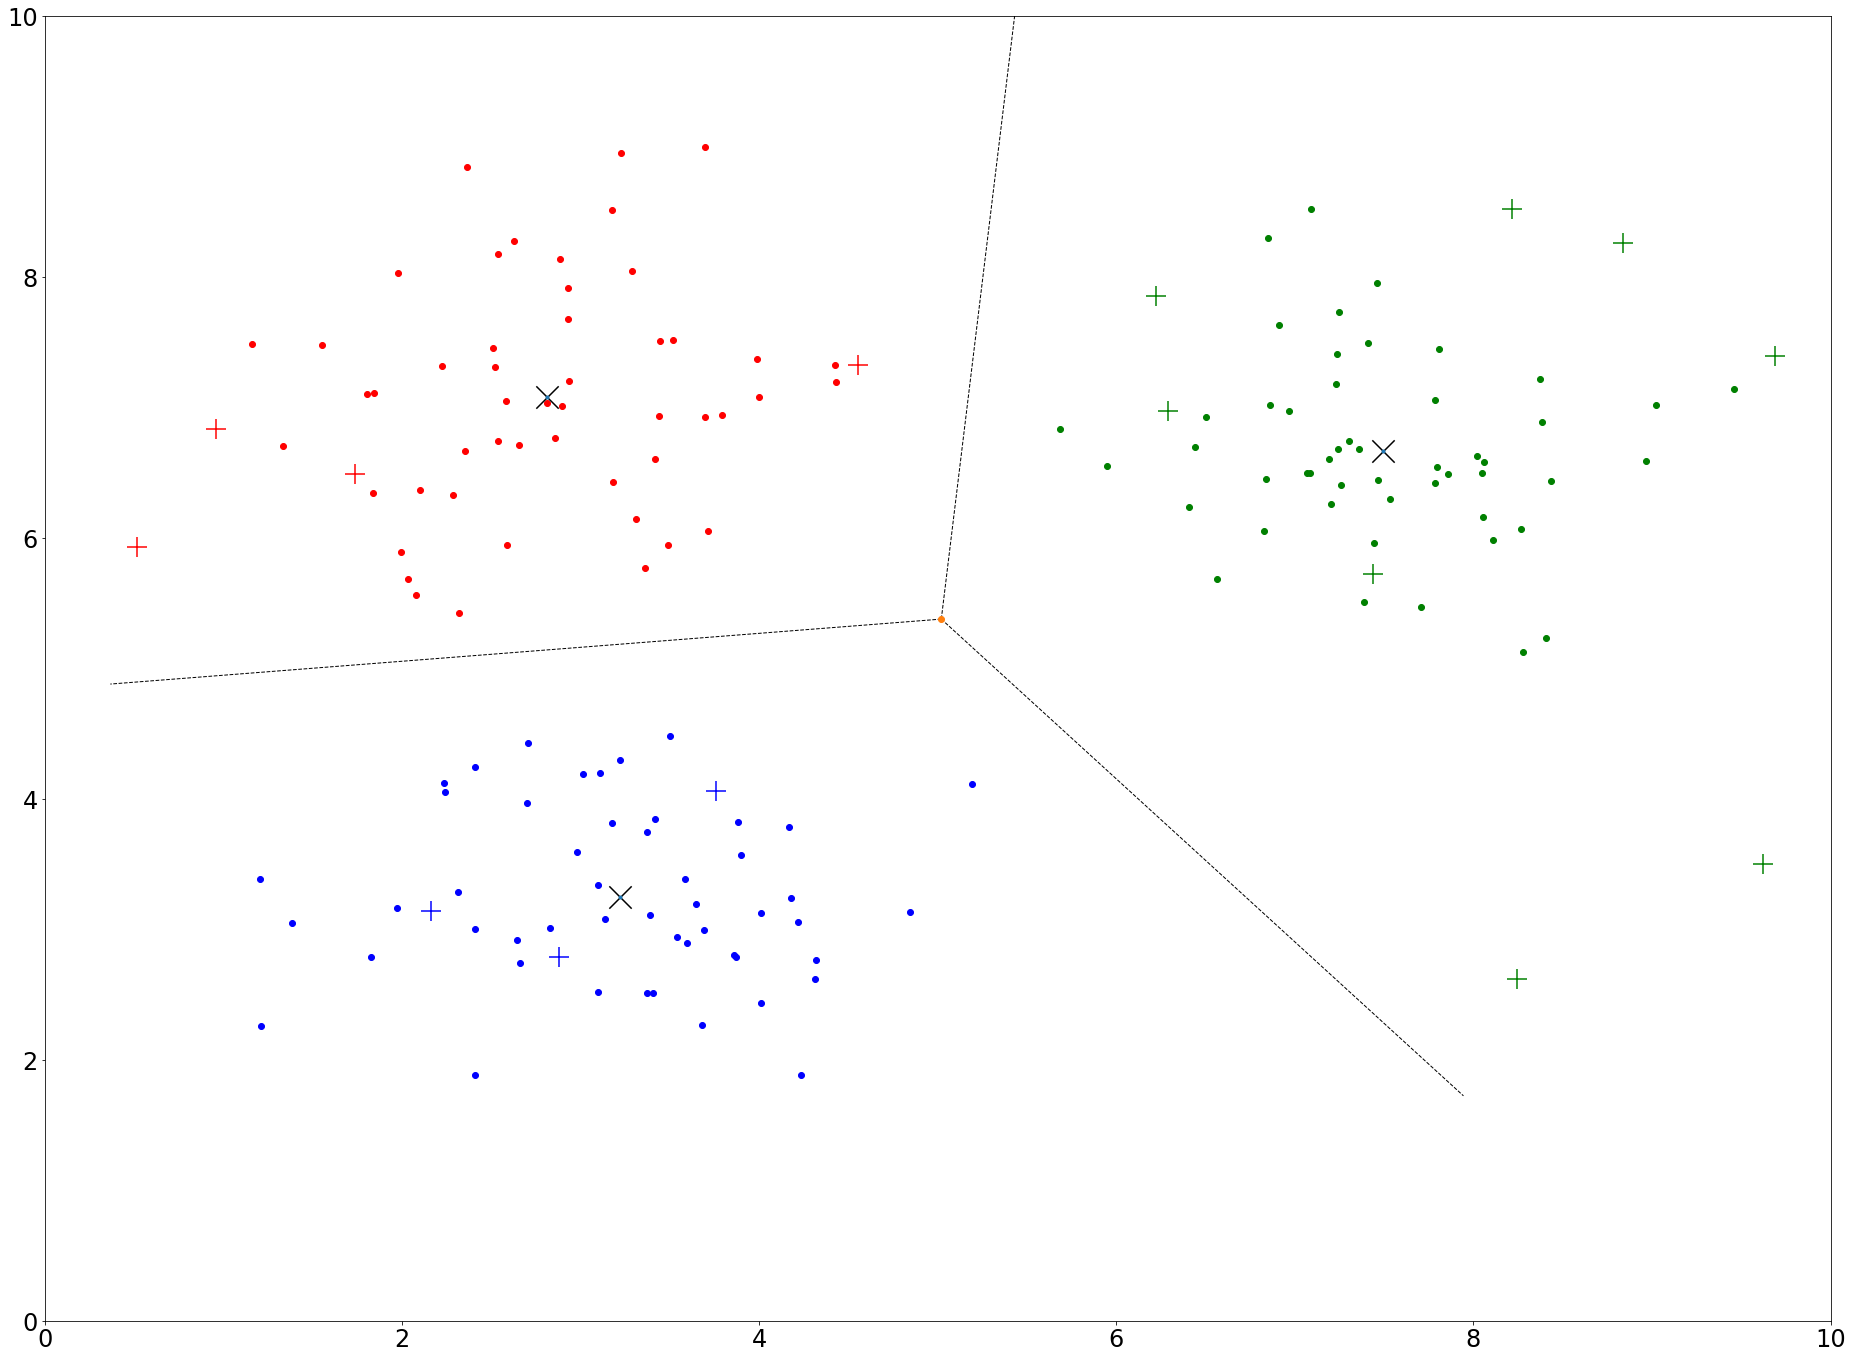

In [7]:


centroidx = np.squeeze(np.asarray(centroids[:,0]))
centroidy = np.squeeze(np.asarray(centroids[:,1]))


    
vor = Voronoi(centroids)
fig = voronoi_plot_2d(vor)
#fig = plt.figure()
axis = fig.add_subplot( 111 )
axis.set_xlim([0,10])
axis.set_ylim([0,10])

for x in range(0,int(B.size/2)):
    axis.scatter( B[x,0], B[x,1], c=colourlist[x])
    
axis.scatter( centroidx, centroidy, c='black', marker = 'x', s=500 )

#vor = Voronoi(centroids)
#voronoi_plot_2d(vor) 

#axis = fig.add_subplot( )

testfile = np.loadtxt('testdata.test')
testdata = np.squeeze(np.asarray([testfile[:,3],testfile[:,4]])).T
#print(testdata)

cdistance = cdist(testdata,centroids)
#print(cdistance)
colourlistTest = []
for x in range(0,int(testdata.size/2)):
    centroid = np.argmin(cdistance[x,:])
    colourlistTest.append(getcolour(centroid))

    
#print(colourlist)
    

testx = np.squeeze(np.asarray(testdata[:,0]))
testy = np.squeeze(np.asarray(testdata[:,1]))

for x in range(0,testx.size):
    axis.scatter( testx[x], testy[x], c=colourlistTest[x], s=400, marker='+')

#vor = Voronoi(centroids)    
#voronoi_plot_2d(vor)

plt.show()



In [8]:
sumC =[0]*len(centroids)

for x in range(0,int(B.size/2)):
    sumC[labels[x]]+=cdist(B[x], [centroids[labels[x]]])**2

    
for x in range(0,len(centroids)):
    print("Custer distance from centroid ",x+1," is ",float(sumC[x]))


#for x in range (0, int(c.size/2)):
#    sumC += (cdist(c[x], [centroids[2]])**2)
#print("Cluster distance C: ", float(sumC))

Custer distance from centroid  1  is  66.62194469985894
Custer distance from centroid  2  is  52.39799301395072
Custer distance from centroid  3  is  59.53502328719834


In [9]:
#SPLIT CLASSES UP
classes = [np.matrix([0,0])]*len(centroids)

#putting into classes based on label
for x in range(0,int(B.size/2)):
    classes[labels[x]]=np.concatenate((classes[labels[x]],B[x,:]))


#delete empty at start of each class        
for x in range(0,len(centroids)):   
    classes[x] = np.delete(classes[x], (0), axis=0)
      
print(len(classes))

3


In [10]:
means = [[0,0]]*len(classes)

#loop through each class
for x in range(0,len(classes)):
    #loop through every point in each class
    for y in range(0, len(classes[x])):
        #print(classes[x][y])
        means[x] = [(means[x][0]+classes[x][y,0]),(means[x][1]+classes[x][y,1])]
    #divide to find mean
    means[x][0] = means[x][0]/(len(classes[x]))
    means[x][1] = means[x][1]/(len(classes[x]))

print(means)

[[2.8125408620000014, 7.0807135280000004], [7.4926520939999977, 6.664972884], [3.2226860779999997, 3.2478201219999998]]


In [21]:
#get covariances 
covariances = [[0]]*len(classes)
#print(covariances)
for x in range(0,len(classes)):
    covariances[x] = np.cov(classes[x].T)
    
for x in range(0,len(covariances)):
    print(covariances[x])


[[ 0.59043198  0.09279924]
 [ 0.09279924  0.76919954]]
[[ 0.57589952 -0.07301288]
 [-0.07301288  0.49344728]]
[[ 0.7780488  -0.02270882]
 [-0.02270882  0.43695168]]


[[  6.10994106e-17   8.49406291e-17   1.16063648e-16 ...,   5.69269829e-38
    1.48292415e-38   3.79683741e-39]
 [  1.46294083e-16   2.03802622e-16   2.79058377e-16 ...,   1.66820545e-37
    4.35466609e-38   1.11728116e-38]
 [  3.45669704e-16   4.82557284e-16   6.62123078e-16 ...,   4.82420460e-37
    1.26193096e-37   3.24449988e-38]
 ..., 
 [  5.90601610e-07   1.00488116e-06   1.68049443e-06 ...,   1.78448795e-19
    5.68926310e-20   1.78279213e-20]
 [  3.91049108e-07   6.66739111e-07   1.11733359e-06 ...,   1.44607867e-19
    4.61996697e-20   1.45073508e-20]
 [  2.55512873e-07   4.36558019e-07   7.33117265e-07 ...,   1.15641851e-19
    3.70225678e-20   1.16498500e-20]]


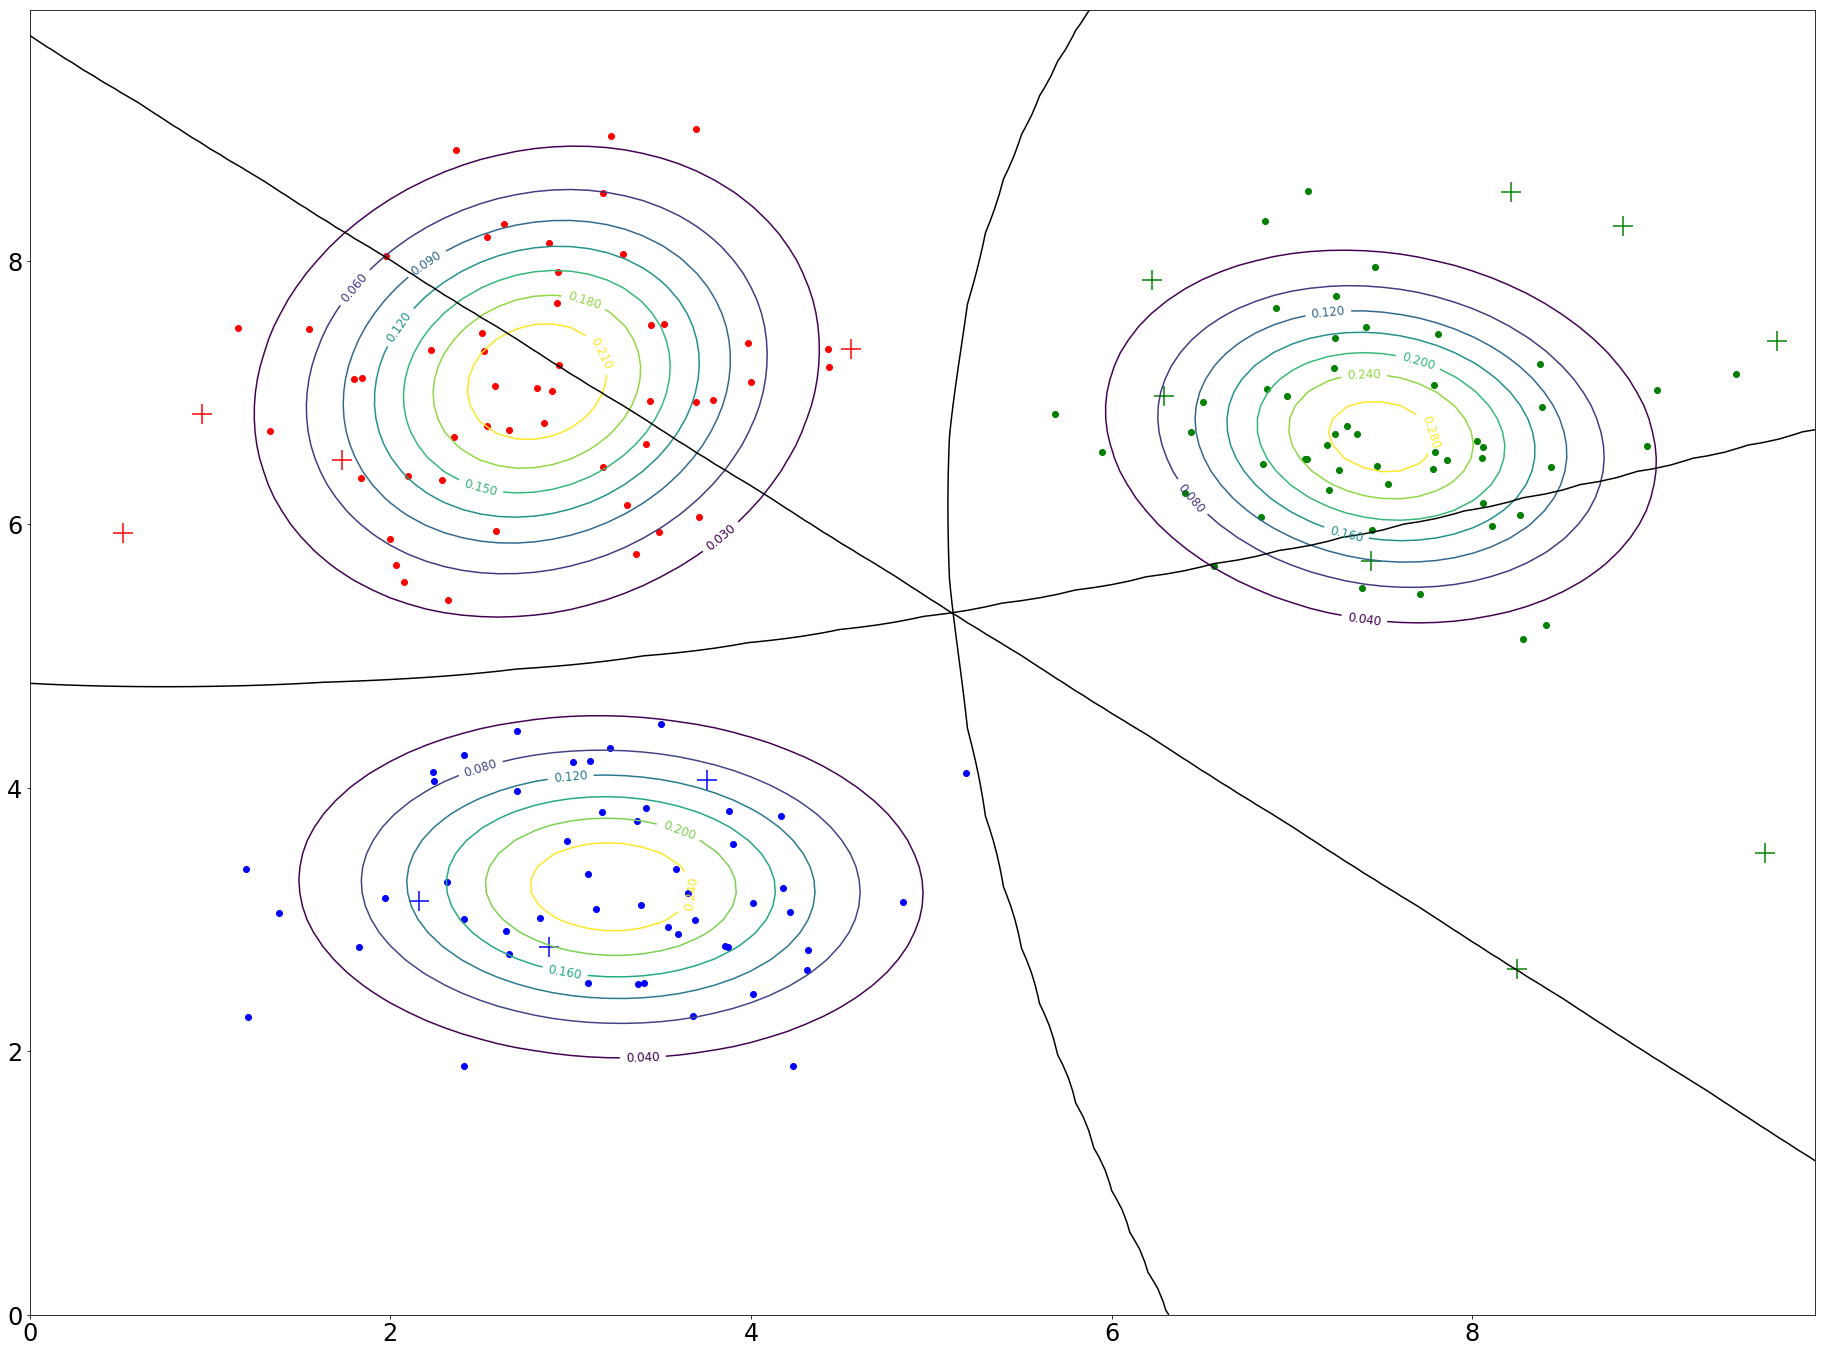

In [17]:

    
def getprob(x, y, mu, sigma):
    vec = np.matrix([x, y])
    mua = np.matrix(mu)
    E = 2.0 * np.pi * np.sqrt(np.linalg.det(sigma))
    P = (1/E) * np.exp(-1 * ((vec-mua) * np.linalg.inv(sigma) * (vec.T-mua.T) / 2.0))
    return float(P) 

def getsigmaP(sigma):
    return  (1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma  )))) * np.exp(-1/2.0)



#CHANGE FOR VIEW
twoD = True
if(twoD):
    for i in range(0,len(classes)):
        x, y = np.mgrid[0:10:.1, 0:10:.1]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x 
        pos[:, :, 1] = y
        rv = multivariate_normal(means[i], covariances[i])
        CS = plt.contour(x, y, rv.pdf(pos))
        plt.clabel(CS, fontsize=12, inline=1)

        for u in range(0,len(classes[i])):
                plt.scatter(classes[i][u,0],classes[i][u,1], c=getcolour(i))

    x = np.arange(0, 10, 0.1)
    y = np.arange(0, 10, 0.1)
    
    #here
    T = np.matrix([[1,0],[0,1]] )
    #end
    
    classP = [[0]]*len(classes)

    for i in range (0, len(classes)):
            classP[i] = np.zeros((len(y), len(x)))

    for i in range(len(x)):
            for j in range(len(y)):
                for k in range(0,len(classes)):
                    classP[k][j,i] = getprob(x[i], y[j], means[k], covariances[k]) #covariances[k]
    
    sumCount = 0.5*len(classes)*(len(classes)-1)
    LR = [[]]*int(sumCount)   
    counter = 0
    for i in range(0, len(classes)):
        for j in range(i+1, len(classes)):
            LR[counter] = np.divide(classP[i],classP[j])
            counter+=1
            
    for i in range(0, len(LR)):
        plt.contour(x, y, LR[i], [1], colors='black')
        
    testx = np.squeeze(np.asarray(testdata[:,0]))
    testy = np.squeeze(np.asarray(testdata[:,1]))

    for x in range(0,testx.size):
        plt.scatter( testx[x], testy[x], c=colourlistTest[x], s=400, marker='+')

else:
    x = np.arange(0, 10, 0.1)
    y = np.arange(0, 10, 0.1)
        
    classP = [[0]]*len(classes)

    for i in range (0, len(classes)):
            classP[i] = np.zeros((len(y), len(x)))

    for i in range(len(x)):
            for j in range(len(y)):
                for k in range(0,len(classes)):
                    classP[k][j,i] = getprob(x[i], y[j], means[k], covariances[k])
                    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    Pbs = 0
    for i in range(0, len(classes)):
        Pbs = np.maximum(Pbs, classP[i])
        
    vmin=np.nanmin(Pbs)
    vmax=np.nanmax(Pbs)

    xl, yl= np.meshgrid(x, y)
    ax.plot_surface(xl, yl, Pbs,\
      vmin=vmin, vmax=vmax,\
      rstride=1, cstride=1, cmap=plt.cm.jet, alpha=0.3, linewidth=0, antialiased=False)

    for i in range(0,len(classes)):
        ax.contour(xl, yl, classP[i], getsigmaP(covariances[i]), colors='black', linewidths=5)
    
    sumCount = 0.5*len(classes)*(len(classes)-1)
    LR = [[]]*int(sumCount)   
    counter = 0
    for i in range(0, len(classes)):
        for j in range(i+1, len(classes)):
            LR[counter] = np.divide(classP[i],classP[j])
            counter+=1
    
    for i in range(0, len(LR)):
        ax.contour(xl, yl, LR[i], [1], offset=0, colors='g', linewidths=5)

    ax.set_zlim(0, 1.5*vmax)
    #ax.view_init(elev=90, azim=-90)

plt.show()



In [13]:
#TO DO/ ASK SOMEONE
#
# - Contours, what? how? why? levels? are they a thing? elipse distance with this?
# - MVNPDF, what does it mean? how is it used? what???
# - mesh grid, what is this?
# - pairwise likelihood values??
#
